# Smoking is bad

In [108]:
# TODO: install all the necessary packages
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [109]:
# TODO: load the data using the pathlib library to create the path to your data
DATAPATH = pathlib.Path.cwd().parent / "ps_2_ex2_smoking_is_bad" / "data" / "smoking_data.csv"
df = pd.read_csv(DATAPATH)
df

,Unnamed: 0,outcome,smoker,age,gender,salary
0,0,Alive,Yes,23,female,7286.0
1,1,Alive,Yes,18,male,NaN
2,2,Dead,Yes,71,male,NaN
3,3,Alive,No,67,male,NaN
4,4,Alive,No,64,female,20123.0
...,...,...,...,...,...,...
1309,1309,Alive,Yes,35,female,NaN
1310,1310,Alive,No,33,female,NaN
1311,1311,Alive,Yes,21,male,NaN
1312,1312,Alive,No,46,female,NaN


In [110]:
# TODO: what are the dimensions of the data frame?
df.shape

(1314, 6)

In [111]:
# TODO: use .describe() on your data frame: what do you notice about the string columns?
# The default behave of describe() only provide a summary for the numerical columns. 
# But use DataFrame.describe(include = 'all') can get a summary of all the columns when the dataframe has mixed column types. 
df.describe(include = "all")

,Unnamed: 0,outcome,smoker,age,gender,salary
count,1314.000000,1314,1314,1314.000000,1314,614.000000
unique,NaN,2,2,NaN,2,NaN
top,NaN,Alive,No,NaN,male,NaN
freq,NaN,945,732,NaN,693,NaN
mean,656.500000,NaN,NaN,46.920091,NaN,48737.265472
std,379.463437,NaN,NaN,17.432027,NaN,28575.395264
min,0.000000,NaN,NaN,18.000000,NaN,1215.000000
25%,328.250000,NaN,NaN,32.000000,NaN,24112.250000
50%,656.500000,NaN,NaN,46.000000,NaN,48692.000000
75%,984.750000,NaN,NaN,61.000000,NaN,72946.250000


In [113]:
# TODO: do not forget to check the null values
df.isnull().sum()

Unnamed: 0      0
outcome         0
smoker          0
age             0
gender          0
salary        700
dtype: int64

In [90]:

avg_salary = df['salary'].mean()
df['salary'] = df['salary'].fillna(avg_salary)

In [114]:
# TODO: prepare your data frame so that you can work with
df['outcome'] = df['outcome'].map({'Alive': 1, 'Dead': 0})

## Smoking analysis
Let's first check what your cousin did.

In [115]:
# TODO: Reimplement the small code snippet described in the problem set instructions.
df.groupby(['smoker']).agg(prob=("outcome", np.mean))

,prob
smoker,
No,0.685792
Yes,0.761168


You should get the same results.

# Is smoking really good?
Now it is up to you to run the analysis further and check what could be underlying your cousings results.

In [123]:
# What is the averaage age of people dead of smoking? 
# On average, smokers die approximately 8.5 years earlier than non-smokers.
df_cat = df.groupby(['smoker', 'outcome']).agg(avg_age=('age', np.mean))
print(df_cat)

                  avg_age
smoker outcome           
No     0        67.613043
       1        40.033865
Yes    0        59.151079
       1        40.142212


/mnt/kernels/kernels/kernel_py311/bin/py-py311/python.runfiles/pypi__seaborn_0_12_2_py3_none_any_whl/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_172/820660104.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


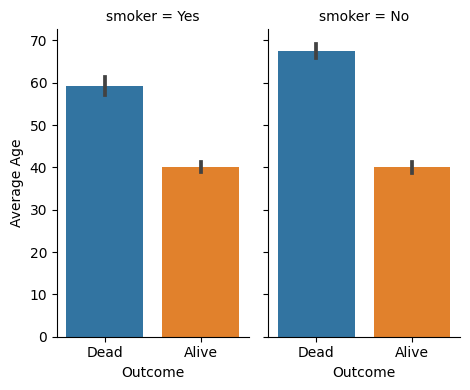

In [124]:
g = sns.catplot(
    data=df, x="outcome", y="age", col="smoker",
    kind="bar", height=4, aspect=.6, 
)
g.set_axis_labels('Outcome', 'Average Age')
g.set_xticklabels(["Dead", "Alive"])
plt.tight_layout()
plt.show()